### Import Modules, Change Directory, Set Variables

In [75]:
import_location = '/Users/johnmccloskey/Desktop/jowilder_data'
import_name = '12172019 jowidler assessment 4.tsv'

In [104]:
import os
import matplotlib.pyplot as plt
import pandas as pd
# os.chdir('..') # Please comment out after done running this cell. If you go too far up, use the next line.
# os.chdir('opengamedata')
os.getcwd()
from game_info.Jowilder import Jowilder_Enumerators as je
from scipy import stats

### Import

In [105]:
df = pd.read_csv(os.path.join(import_location,import_name), sep='\t',index_col='sessionID')
print(df.shape)
df.head()

(233, 376)


,lvl0_EventCount,lvl0_count_clicks,lvl0_count_hovers,lvl0_avgTimePerTextBox,lvl0_time_in_level,lvl0_meaningful_action_count,lvl0_words_per_second,lvl0_count_notebook_uses,lvl0_avg_time_between_clicks,lvl1_EventCount,...,sess_avgTimePerWord,sess_avgTimePerTextBox,sess_stDevTimePerTextBox,sess_words_per_second,sess_count_notebook_uses,sess_avg_time_between_clicks,save_code,music,hq,fullscreen
sessionID,,,,,,,,,,,,,,,,,,,,,
19110000090781600,34,26.0,6.0,1.672167,63.535,3.0,3.970336,NaN,2.096680,30.0,...,0,16.005742,0,4.125283,8,161.139635,0,1,0,0
19110009114094480,21,18.0,1.0,1.839250,44.510,1.0,4.523686,NaN,1.195588,27.0,...,0,7.617183,0,4.731634,6,2.034186,donethework,1,0,0
19110012454548376,43,36.0,5.0,1.545500,73.820,4.0,6.184182,NaN,1.584343,114.0,...,0,7.371897,0,7.551905,11,1.610426,0,1,1,True
19110013234266620,2,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,...,0,4.979176,0,9.855149,6,1.309599,0,1,0,0
19110014392453668,2,NaN,NaN,NaN,0.002,NaN,NaN,NaN,NaN,NaN,...,0,6.194067,0,6.349095,1,1.576921,0,1,0,0


### Drop Rows with save_codes (continues) or not all wps's

In [106]:
df = df.drop(df[df['save_code'] != '0'].index)
lvls = range(19)
wps_col_names = [f'lvl{lvl}_words_per_second' for lvl in lvls]
df = df.dropna(subset=wps_col_names)
print(df.shape)
df.head()

(118, 376)


,lvl0_EventCount,lvl0_count_clicks,lvl0_count_hovers,lvl0_avgTimePerTextBox,lvl0_time_in_level,lvl0_meaningful_action_count,lvl0_words_per_second,lvl0_count_notebook_uses,lvl0_avg_time_between_clicks,lvl1_EventCount,...,sess_avgTimePerWord,sess_avgTimePerTextBox,sess_stDevTimePerTextBox,sess_words_per_second,sess_count_notebook_uses,sess_avg_time_between_clicks,save_code,music,hq,fullscreen
sessionID,,,,,,,,,,,,,,,,,,,,,
19110000090781600,34,26.0,6.0,1.672167,63.535,3.0,3.970336,NaN,2.096680,30.0,...,0,16.005742,0,4.125283,8,161.139635,0,1,0,0
19110012454548376,43,36.0,5.0,1.545500,73.820,4.0,6.184182,NaN,1.584343,114.0,...,0,7.371897,0,7.551905,11,1.610426,0,1,1,True
19110016345644932,40,28.0,10.0,1.154714,200.637,4.0,5.354636,NaN,1.410185,34.0,...,0,5.708855,0,6.087589,2,2.864502,0,1,0,0
19110017043011900,32,28.0,2.0,1.618800,39.079,2.0,4.725599,NaN,0.937926,58.0,...,0,6.506622,0,10.958594,1,0.900201,0,1,0,0
19110017124036790,40,30.0,8.0,2.739200,40.764,2.0,4.006595,NaN,1.153345,32.0,...,0,6.677494,0,6.231409,3,1.298599,0,1,0,0


lvl0_words_per_second


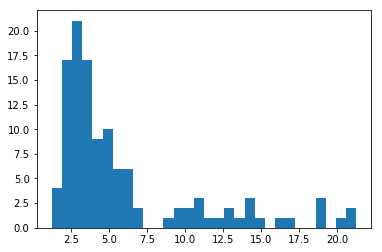

lvl1_words_per_second


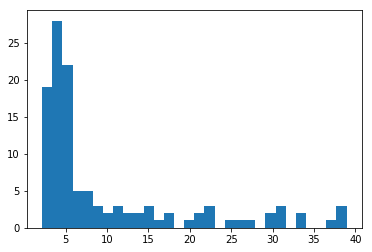

lvl2_words_per_second


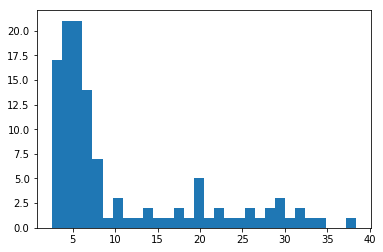

lvl3_words_per_second


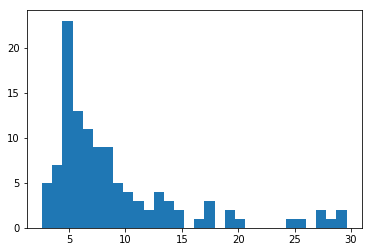

lvl4_words_per_second


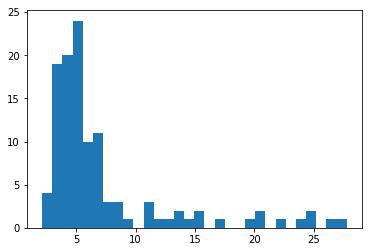

lvl5_words_per_second


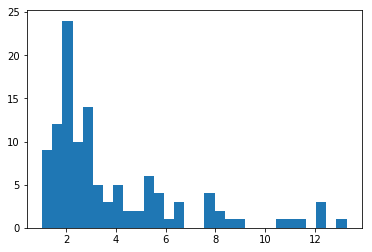

lvl6_words_per_second


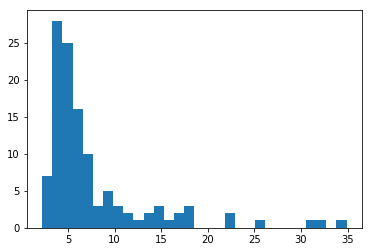

lvl7_words_per_second


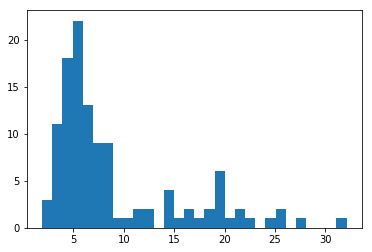

lvl8_words_per_second


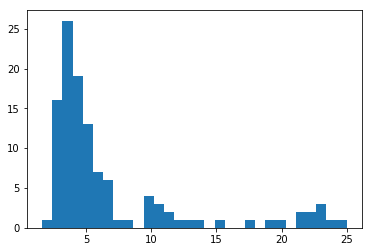

lvl9_words_per_second


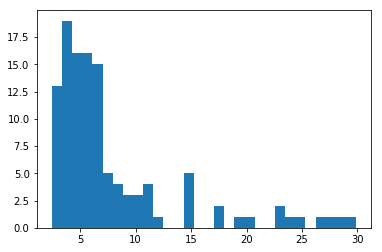

lvl10_words_per_second


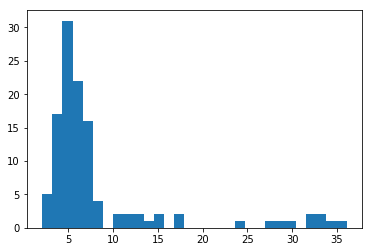

lvl11_words_per_second


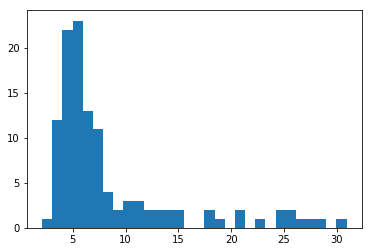

lvl12_words_per_second


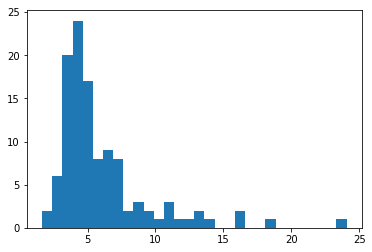

lvl13_words_per_second


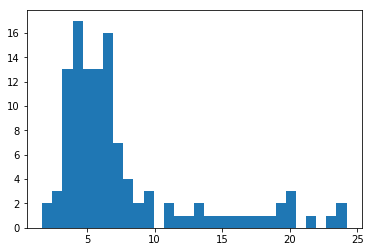

lvl14_words_per_second


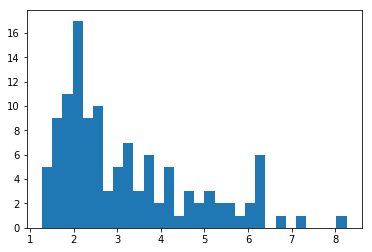

lvl15_words_per_second


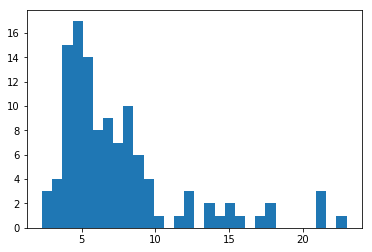

lvl16_words_per_second


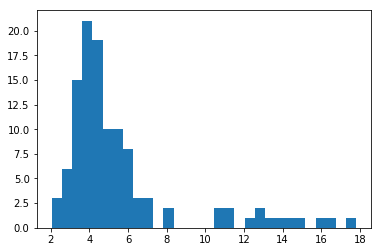

lvl17_words_per_second


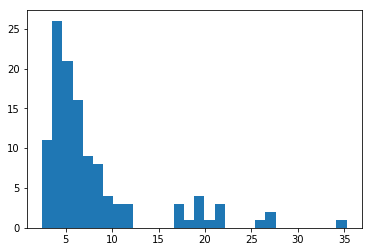

lvl18_words_per_second


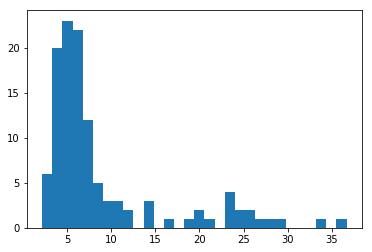

In [126]:
def get_histogram_level_feat(fname_base, lvl):
    fname = f'lvl{lvl}_{fname_base}'
    wps_df = df[[fname]]
    wps_df_no_outliers = wps_df[(np.abs(stats.zscore(wps_df)) < 3).all(axis=1)]
    wps = list((wps_df_no_outliers)[fname])
    plt.hist(wps, bins=30)
    print(fname)
    plt.show()
for i in range(19):
    get_histogram_level_feat('words_per_second',i)